In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import random

In [2]:
TARGET_SIZE = (144, 256)

In [3]:
directory = "models/VA62_9-6-23"

model = tf.keras.models.load_model(f"{directory}/model.h5")
detokenizer = np.load(f"{directory}/detokenizer.npy", allow_pickle=True).item()

In [4]:
def preprocess_image(image_path):
    image = load_img(image_path, target_size=TARGET_SIZE) 
    image = img_to_array(image) / 255.0

    return image

In [7]:
def predict(filename):
    image = preprocess_image(filename)
    image = tf.expand_dims(image,0)

    plt.imshow(image[0])
    
    predictions = model.predict(image)[0]
    predictions = np.argmax(predictions)

    result = detokenizer[predictions]

    return result


1/1 [==============================] - 0s 16ms/step
predictions | 1_0_0_0_1
actual      | 1_0_1_0_1.png


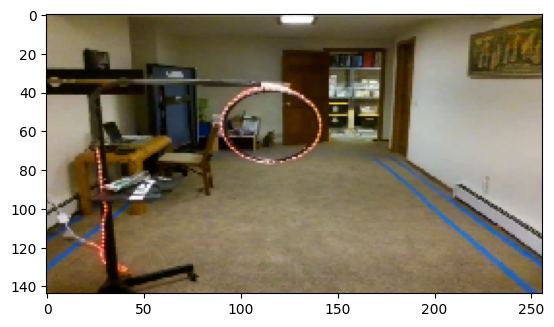

In [40]:
filename = random.choice(tf.io.gfile.glob("data/*/*.png"))
actual = "_".join(filename.split("_")[-5:])

predictions = predict(filename)
print(f"predictions | {predictions}")
print(f"actual      | {actual}")